In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
nRowsRead = None

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/NYPD_Complaint_Data_Current__Year_To_Date_.csv')

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 96734 rows and 36 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96734 entries, 0 to 96733
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CMPLNT_NUM                96734 non-null  int64  
 1   ADDR_PCT_CD               96734 non-null  int64  
 2   BORO_NM                   96632 non-null  object 
 3   CMPLNT_FR_DT              96734 non-null  object 
 4   CMPLNT_FR_TM              96734 non-null  object 
 5   CMPLNT_TO_DT              88039 non-null  object 
 6   CMPLNT_TO_TM              88067 non-null  object 
 7   CRM_ATPT_CPTD_CD          96682 non-null  object 
 8   HADEVELOPT                395 non-null    object 
 9   HOUSING_PSA               7868 non-null   float64
 10  JURISDICTION_CODE         96646 non-null  float64
 11  JURIS_DESC                96734 non-null  object 
 12  KY_CD                     96734 non-null  int64  
 13  LAW_CAT_CD                96734 non-null  object 
 14  LOC_OF

In [ ]:
df.count()

CMPLNT_NUM                  96734
ADDR_PCT_CD                 96734
BORO_NM                     96632
CMPLNT_FR_DT                96734
CMPLNT_FR_TM                96734
CMPLNT_TO_DT                88039
CMPLNT_TO_TM                88067
CRM_ATPT_CPTD_CD            96682
HADEVELOPT                    395
HOUSING_PSA                  7868
JURISDICTION_CODE           96646
JURIS_DESC                  96734
KY_CD                       96734
LAW_CAT_CD                  96734
LOC_OF_OCCUR_DESC           81791
OFNS_DESC                   96731
PARKS_NM                      352
PATROL_BORO                 96646
PD_CD                       96646
PD_DESC                     96646
PREM_TYP_DESC               96462
RPT_DT                      96734
STATION_NAME                 1939
SUSP_AGE_GROUP              76359
SUSP_RACE                   76359
SUSP_SEX                    76359
TRANSIT_DISTRICT             1939
VIC_AGE_GROUP               96734
VIC_RACE                    96731
VIC_SEX       

In [ ]:
columns_remove = ['TRANSIT_DISTRICT','STATION_NAME','RPT_DT','PARKS_NM','HADEVELOPT','HADEVELOPT','CRM_ATPT_CPTD_CD','ADDR_PCT_CD','CMPLNT_NUM','CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'HADEVELOPT', 'HOUSING_PSA', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'RPT_DT', 'STATION_NAME', 'TRANSIT_DISTRICT', 'X_COORD_CD','Y_COORD_CD', 'Lat_Lon']
df = df.drop(columns_remove, axis=1)

In [ ]:
print(df)

         BORO_NM  ...                       New Georeferenced Column
0       BROOKLYN  ...   POINT (-73.98633121699999 40.69105856700002)
1            NaN  ...   POINT (-73.98713051799997 40.71608268700004)
2            NaN  ...   POINT (-73.87513706799997 40.66818803900002)
3      MANHATTAN  ...   POINT (-73.98928217599996 40.75043076800005)
4         QUEENS  ...   POINT (-73.86537333399998 40.74960053300003)
...          ...  ...                                            ...
96729   BROOKLYN  ...  POINT (-73.97889574699997 40.668146816000046)
96730      BRONX  ...        POINT (-73.859568127 40.89251396600008)
96731      BRONX  ...   POINT (-73.90846796099999 40.81944420600007)
96732  MANHATTAN  ...   POINT (-73.99133946299997 40.75002197300005)
96733   BROOKLYN  ...   POINT (-73.95291287199996 40.71407010200004)

[96734 rows x 21 columns]


In [ ]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True)
df.dropna(subset=['CMPLNT_FR_TM'], inplace=True)

In [ ]:
df.replace('UNKNOWN', np.NaN, inplace=True)
df.replace('E', np.NaN, inplace=True)
df.replace('C', np.NaN, inplace=True)

df.replace('D', np.NaN, inplace=True)
df.replace('U', np.NaN, inplace=True)

In [ ]:
print('Number of rows before removing rows with missing values: ' + str(df.shape[0]))
df.dropna(axis=0, inplace=True)
print('Number of rows after removing rows with missing values: ' + str(df.shape[0]))

Number of rows before removing rows with missing values: 96734
Number of rows after removing rows with missing values: 28270


In [ ]:
df['CMPLNT_FR_YEAR'] = df['CMPLNT_FR_DT'].map(lambda x: int(str(x).split('/')[2]))
df['CMPLNT_FR_MONTH'] = df['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[0]))
df['CMPLNT_FR_DAY'] = df['CMPLNT_FR_DT'].map(lambda x: int(x.split('/')[1]))
# df['CMPLNT_FR_HOUR'] = df['CMPLNT_FR_TM'].map(lambda x: int(x.split(':')[0])

In [ ]:
pd.unique(df.CMPLNT_FR_YEAR)

array([2021, 2020, 2019, 2009, 2016, 2018, 2014, 2008, 2012, 2017, 2004,
       2011, 2005, 2007, 1981, 2010, 2015, 1997, 1971, 2013, 2001, 2003,
       2000, 1988, 2002, 1993, 1991, 1999, 2006, 1972])

In [ ]:
df = df[df['CMPLNT_FR_YEAR'] > 2005]

In [ ]:
pd.unique(df.CMPLNT_FR_YEAR)

array([2021, 2020, 2019, 2009, 2016, 2018, 2014, 2008, 2012, 2017, 2011,
       2007, 2010, 2015, 2013, 2006])

In [ ]:
df

,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,OFNS_DESC,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude,New Georeferenced Column,CMPLNT_FR_YEAR,CMPLNT_FR_MONTH,CMPLNT_FR_DAY
8,BRONX,03/22/2021,17:45:00,0.0,N.Y. POLICE DEPT,107,FELONY,BURGLARY,PATROL BORO BRONX,221.0,"BURGLARY,RESIDENCE,DAY",RESIDENCE - APT. HOUSE,25-44,BLACK,M,45-64,BLACK,F,40.824941,-73.878322,POINT (-73.87832247299998 40.82494145800007),2021,3,22
25,QUEENS,02/28/2021,15:00:00,0.0,N.Y. POLICE DEPT,361,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,PATROL BORO QUEENS SOUTH,661.0,"LEWDNESS,PUBLIC",STREET,25-44,ASIAN / PACIFIC ISLANDER,M,45-64,WHITE,F,40.717764,-73.758138,POINT (-73.75813846299998 40.71776441700007),2021,2,28
35,BRONX,02/16/2021,21:19:00,0.0,N.Y. POLICE DEPT,361,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,PATROL BORO BRONX,639.0,AGGRAVATED HARASSMENT 2,RESIDENCE - APT. HOUSE,65+,WHITE,M,65+,WHITE,M,40.850829,-73.835680,POINT (-73.83568025399995 40.85082888400007),2021,2,16
38,MANHATTAN,02/20/2021,13:30:00,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,PATROL BORO MAN NORTH,101.0,ASSAULT 3,STREET,45-64,BLACK,M,45-64,BLACK,M,40.808374,-73.946886,POINT (-73.94688582299993 40.80837413600005),2021,2,20
42,BRONX,02/12/2021,04:49:00,0.0,N.Y. POLICE DEPT,341,MISDEMEANOR,PETIT LARCENY,PATROL BORO BRONX,321.0,"LARCENY,PETIT FROM AUTO",STREET,45-64,BLACK,M,45-64,BLACK,M,40.835925,-73.921831,POINT (-73.92183088599995 40.83592508100002),2021,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96715,QUEENS,01/01/2021,05:30:00,0.0,N.Y. POLICE DEPT,578,VIOLATION,HARRASSMENT 2,PATROL BORO QUEENS NORTH,637.0,"HARASSMENT,SUBD 1,CIVILIAN",RESIDENCE-HOUSE,25-44,WHITE HISPANIC,F,25-44,WHITE HISPANIC,M,40.752395,-73.867735,POINT (-73.86773538399994 40.752394681000055),2021,1,1
96724,QUEENS,01/04/2021,17:20:00,0.0,N.Y. POLICE DEPT,107,FELONY,BURGLARY,PATROL BORO QUEENS SOUTH,221.0,"BURGLARY,RESIDENCE,DAY",RESIDENCE - APT. HOUSE,45-64,WHITE HISPANIC,M,18-24,WHITE HISPANIC,M,40.598256,-73.755230,POINT (-73.75522965799998 40.59825555300005),2021,1,4
96728,BROOKLYN,01/05/2021,07:20:00,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,PATROL BORO BKLYN SOUTH,113.0,"MENACING,UNCLASSIFIED",RESIDENCE-HOUSE,25-44,BLACK,M,45-64,BLACK,F,40.615744,-73.915580,POINT (-73.91558008099996 40.61574449600005),2021,1,5
96729,BROOKLYN,01/03/2021,18:53:00,0.0,N.Y. POLICE DEPT,344,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,PATROL BORO BKLYN SOUTH,101.0,ASSAULT 3,HOSPITAL,<18,BLACK,F,45-64,WHITE HISPANIC,M,40.668147,-73.978896,POINT (-73.97889574699997 40.668146816000046),2021,1,3


In [25]:
unique, counts = np.unique(df['VIC_RACE'], return_counts=True)
dict(zip(unique, counts))

{'AMERICAN INDIAN/ALASKAN NATIVE': 107,
 'ASIAN / PACIFIC ISLANDER': 2489,
 'BLACK': 11674,
 'BLACK HISPANIC': 1691,
 'WHITE': 4634,
 'WHITE HISPANIC': 7648}

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline
sns.set_style("whitegrid")

In [28]:
cross_table = df.groupby(['SUSP_RACE', 'VIC_RACE'])['OFNS_DESC'].count()

In [29]:
cross_table = cross_table.divide(cross_table.sum(), axis=0).unstack(level=0)

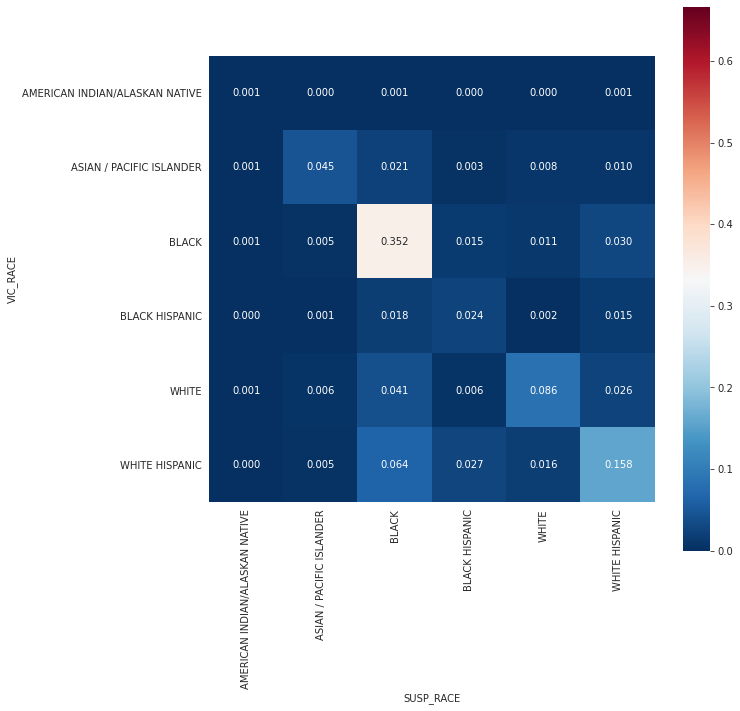

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(cross_table, cmap='RdBu_r', ax=ax,square=True,vmin=0, vmax=0.666,annot=True,fmt='.3f',)

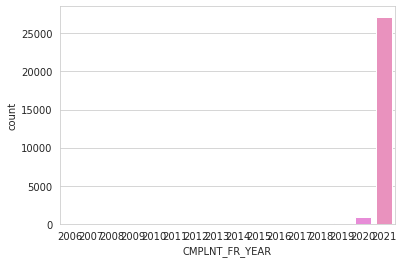

In [31]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df)

In [32]:
pd.unique(df.LAW_CAT_CD)

array(['FELONY', 'MISDEMEANOR', 'VIOLATION'], dtype=object)

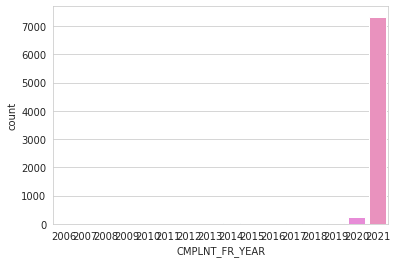

In [33]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'FELONY'])

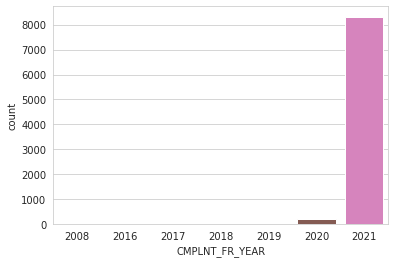

In [34]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'VIOLATION'])

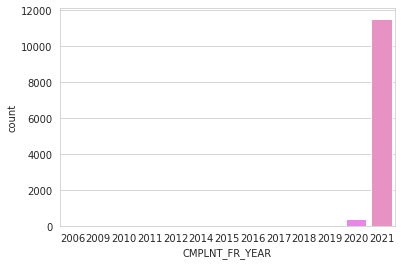

In [35]:
sns.countplot(x='CMPLNT_FR_YEAR', data=df[df['LAW_CAT_CD'] == 'MISDEMEANOR'])

In [36]:
df['BORO_NM']

8            BRONX
25          QUEENS
35           BRONX
38       MANHATTAN
42           BRONX
           ...    
96715       QUEENS
96724       QUEENS
96728     BROOKLYN
96729     BROOKLYN
96732    MANHATTAN
Name: BORO_NM, Length: 28243, dtype: object

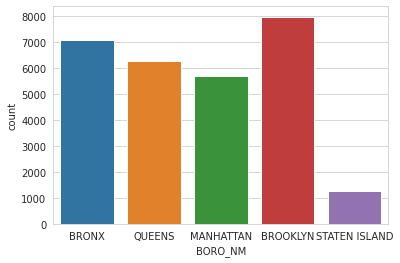

In [37]:

sns.countplot(x='BORO_NM', data=df)



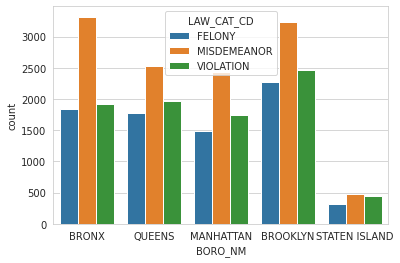

In [38]:
sns.countplot(x='BORO_NM', hue="LAW_CAT_CD", data=df)

In [ ]:
df = df[df['CMPLNT_FR_YEAR'] > 2015]

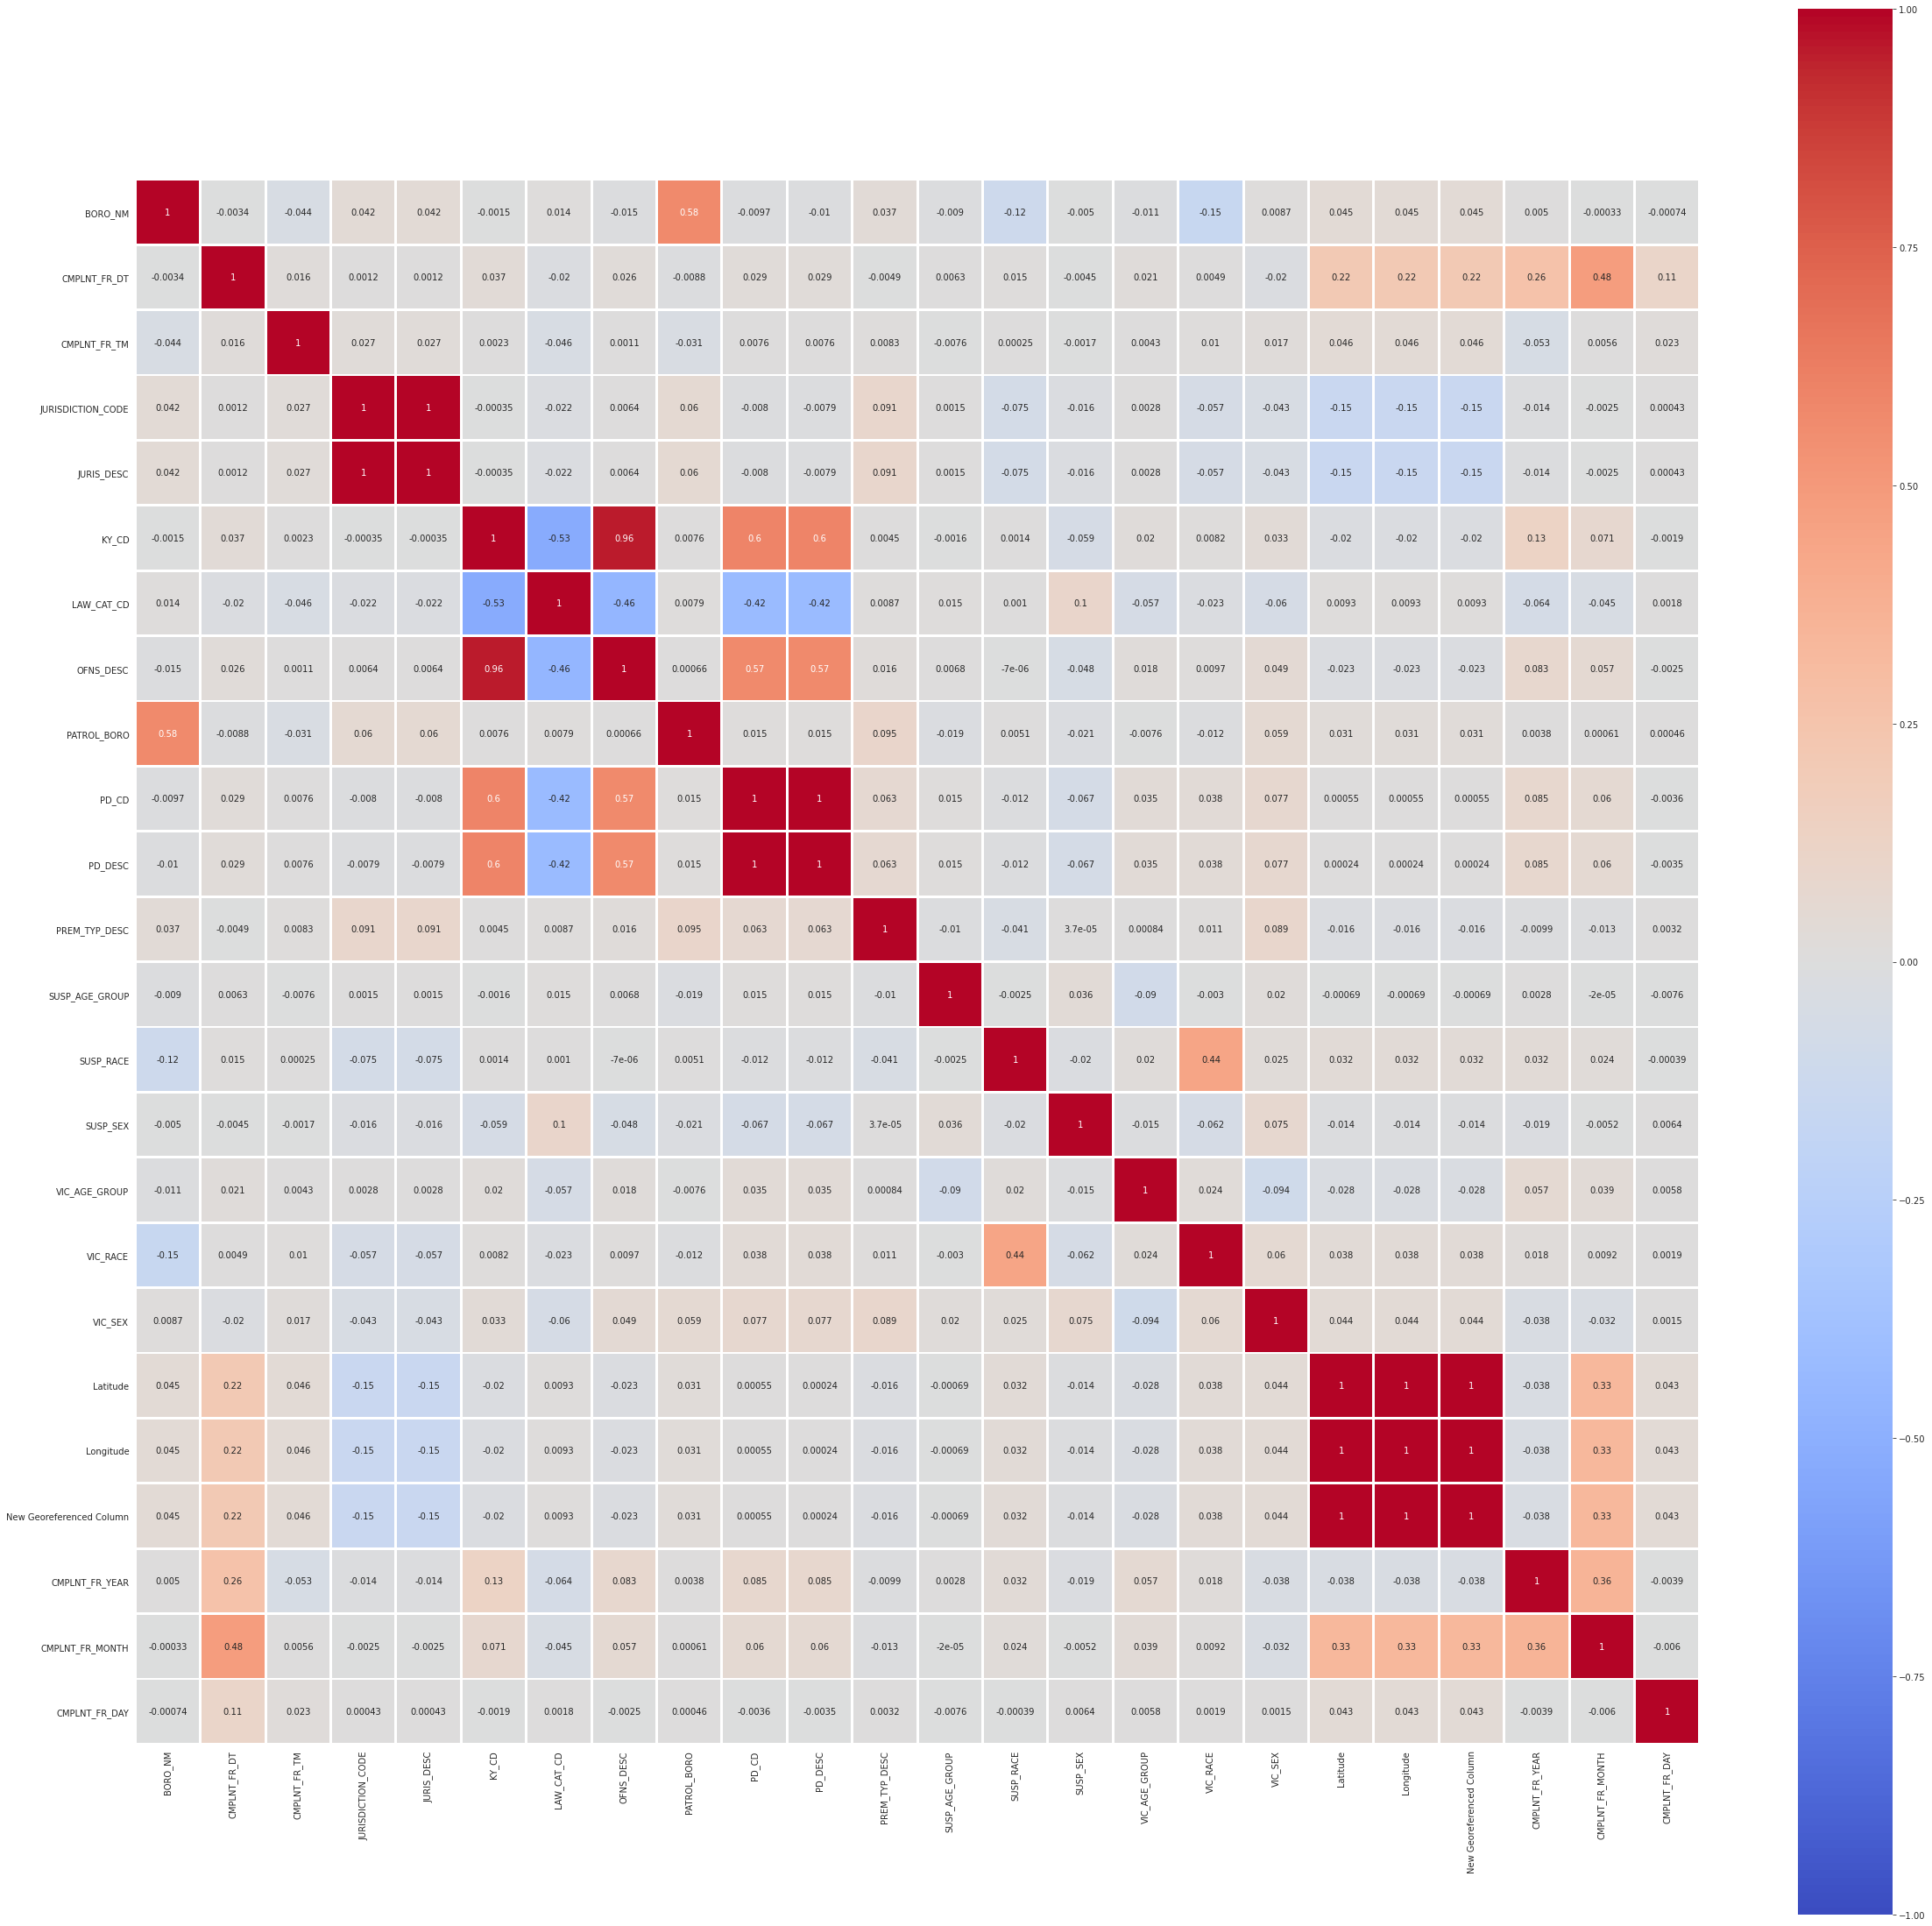

In [39]:
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize = (40,40))
sns_plot = sns.heatmap(corr, cmap = "coolwarm", linewidth = 2, linecolor = "white", annot=True,vmin=-1, vmax=1, center=0, square=True)
plt.savefig("corr.png")

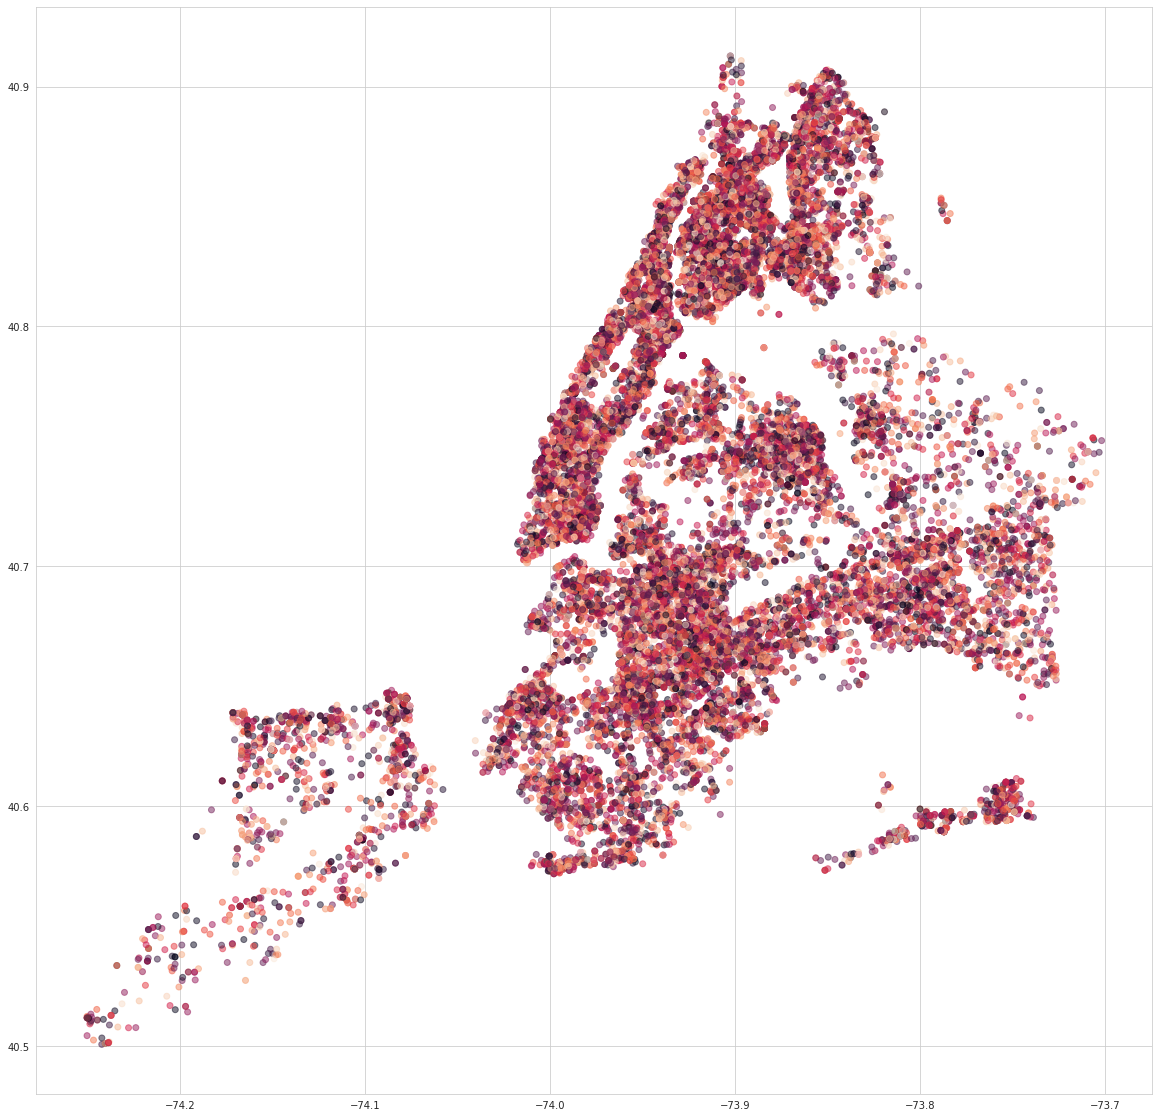

In [40]:
colors = np.random.rand(len(df['Longitude']))

plt.figure(figsize=(20,20))
plt.scatter(df['Longitude'], df['Latitude'],c=colors, alpha=0.5)
plt.show()